In [93]:
import numpy as np
import pandas as pd
import scipy.spatial as sp
import scipy.interpolate as snt
import biocircuits
import tqdm
from math import ceil

import colorcet as cc
import holoviews as hv
import bokeh.io
import bokeh.plotting
import bokeh_catplot

from datetime import date

hv.extension('matplotlib')
bokeh.io.output_notebook()

import warnings
warnings.filterwarnings("ignore", message="aspect is not supported for Axes with")

colors = cc.palette.glasbey_category10
ceiling = np.vectorize(ceil)
sample_cycle = lambda cycle, size: hv.Cycle([cycle[i] for i in ceiling(np.linspace(0, len(cycle) - 1, size))])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Loading BokehJS ...

In [94]:
%run lattice_signaling.py
%run lattice_oop.py

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

All lattice_signaling.py functions imported.


In [95]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


<hr>

For a given transceiver cell $i$ with GFP expression $E_i$ on a hexagonal lattice,

\begin{align}
\frac{\mathrm{d} E_i}{\mathrm{d} t} &= \lambda + \alpha\, \frac{\overline{E_i}(t-\tau)^{\,p_s}}{k_s^{\,p_s} + \left(\delta E_i(t-\tau)\right)^{\,p_s} + \overline{E_i}(t-\tau)^{\,p_s}} - E_i \\[1em]
\overline{E}(t) &= \frac{1}{6} A \bullet E(t) \\[1em]
\end{align}

Here, $A=(a_{nm})$ is the symmetric unweighted adjacency matrix denoting whether cells $n$ and $m$ are adjacent. $A_{i*}$ is the $i$th row of $A$. $\overline{E_i}$ is the amount of signaling cell $i$ receives from its neighbors. 

Other parameters:
- $\lambda$:  basal promoter leakiness
- $\tau$:  time delay of transcription/translation
- $\alpha$:  promoter strength
- $k_s$: threshold for activation
- $p_s$: Hill coefficient of activation
- $\delta$:  strength of inhibition, relative to activation



<hr>

In [96]:
import glob

data_files = glob.glob("./2020-07-22_2D_delay_data/*.csv")

In [97]:
data_files

['./2020-07-22_2D_delay_data\\sender_zs_cis_delay_leak0.csv',
 './2020-07-22_2D_delay_data\\sender_zs_cis_delay_leak1.csv',
 './2020-07-22_2D_delay_data\\sender_zs_cis_delay_leak2.csv']

In [98]:
full_data = []
for file in data_files:
    full_data.append(pd.read_csv(file, index_col=0))
    
full_data = pd.concat(full_data)

In [71]:
# df1 = pd.read_csv("2020-07-09_2D_delay_data/sender_zs_cis_delay_leak1.csv", index_col=0)
# df2 = pd.read_csv("2020-07-09_2D_delay_data/sender_zs_cis_delay_leak2.csv", index_col=0)
# df3 = pd.read_csv("2020-07-09_2D_delay_data/sender_zs_cis_delay_leak3.csv", index_col=0)

# full_data = pd.concat([df1, df2, df3])

In [99]:
alpha_space = np.sort(np.unique(full_data["alpha"]))
k_s_space = np.sort(np.unique(full_data["k_s"]))
p_s_space = np.sort(np.unique(full_data["p_s"]))
delta_space = np.sort(np.unique(full_data["delta"]))
lambda_space = np.sort(np.unique(full_data["lambda"]))
tau_space = np.sort(np.unique(full_data["tau"]))

In [128]:
print(
    """
The following parameter ranges were sampled:
alpha  : {0:>8.2f}  -  {1:<8.2f}
k_s    : {2:>8.2e}  -  {3:<8.2e}
p_s    : {4:>8.1f}  -  {5:<8.1f}
delta  : {6:>8.2f}  -  {7:<8.2f}
lambda : {8:>8.2e}  -  {9:<8.2e}
tau    : {10:>8.2f}  -  {7:<8.2f}
""".format(
        alpha_space[0],
        alpha_space[-1],
        k_s_space[0],
        k_s_space[-1],
        p_s_space[0],
        p_s_space[-1],
        delta_space[0],
        delta_space[-1],
        lambda_space[0],
        lambda_space[-1],
        tau_space[0],
        tau_space[-1],
    )
)

In [129]:
print(f"Number of runs: {np.unique(full_data['run']).size}")

Number of runs: 637


What are the metrics I can use to parse results from 1500 runs without manually looking at every one?

- Monotonicity - categorize monotonic vs non-monotonic behavior for first TC and last TC 
- End-behavior - uniformity of steady-states/end states (variance of end-time TC expression?); average end-time TC expression
- Extreme behavior - max per TC, average max per run, lowest max per run, number of non-boundary local extrema (i.e. oscillatory behavior - use scipy.signal.argrelextrema), variance of NBLE, mean and variance of max minus end

In [130]:
## Define functions for each metric
# Monotonicity
def is_increasing(arr): 
    arr = np.array(arr)
    return np.all(arr[:-1] <= arr[1:])


def not_increasing(arr): 
    arr = np.array(arr)
    return np.any(arr[:-1] > arr[1:])

from collections import Counter



# def first_increasing(grouped, col="expression"): return (grouped[col])

In [131]:
grouped = full_data.groupby("run")

In [132]:
# Slice data to view only transceivers
TC_data = full_data.loc[full_data["X_coord"] != 0, :]

# Calculate how many TCs in each run exhibit monotonic behavior (i.e. cannot be dynamic)
xx = TC_data.groupby(["run", "X_coord"])["expression"].apply(is_increasing)
yy = xx.groupby("run").agg(lambda x: int(sum(x)))

# Get frequency table
from collections import Counter
zz = Counter(yy)

zz

Counter({10: 249,
         1: 20,
         2: 10,
         3: 5,
         0: 277,
         7: 14,
         6: 7,
         9: 30,
         8: 19,
         5: 3,
         4: 3})

There are 657 runs where 0/10 cells exhibit monotonic behavior, so I will select them for further analysis. Next, I'll examine their end-behavior. For each run, I'll look at the mean, std. dev., and coeff. of var. of end-time expression.

In [133]:
non_mon_runs = (yy.values == 0).nonzero()
non_mon_TC_data = TC_data.loc[np.isin(TC_data["run"].values, non_mon_runs), :]

In [134]:
end_time_TC_data = non_mon_TC_data.loc[non_mon_TC_data.step == non_mon_TC_data.step.max(), :]
end_time_TC_means = end_time_TC_data.groupby("run").expression.agg(np.mean)
end_time_TC_sds = end_time_TC_data.groupby("run").expression.agg(np.std)

end_time_TC_covs = end_time_TC_sds / end_time_TC_means

I also want to know how the end-time expression (~steady state) compares to the maximal expression during wave propagation. For transient "spikes" of ligand (akin to perfect adaptation), this will be a large difference. For imperfect adaptation, it will be intermediate. It will be zero for cells that have an intermediate local maximum before rising to a higher steady-state (or end-time state). This is not an interesting dynamic behavior, nor does it explain observations, so I will further filter out runs where any TCs have end-time expression equal to maximum.

In [135]:
end_ex_TC = end_time_TC_data.set_index(["run", "cell"]).expression

In [136]:
max_ex_TC = non_mon_TC_data.groupby(["run", "cell"]).expression.agg(max)

In [137]:
dynamic_runs = (max_ex_TC != end_ex_TC).groupby("run").agg(lambda x: int(sum(x)) == 10).values.nonzero()[0]

In [138]:
dynamic_TC_data = TC_data.loc[np.isin(TC_data["run"].values, dynamic_runs), :]

In [139]:
pulse_data = pd.concat([max_ex_TC, end_ex_TC], axis=1)
pulse_data.columns = ["max_expression", "end_expression"]
pulse_data["diff"] = pulse_data.max_expression - pulse_data.end_expression
max_pulse_run = pulse_data.groupby("run")["diff"].agg(min).idxmax()

max_pulse_run

630

In [153]:
metrics = full_data.loc[:, ["run", "alpha", "k_s", "p_s", "delta", "lambda", "tau"]].drop_duplicates().set_index("run")

In [154]:
def get_perfectness(data, cell_x_coord):
    """Calculate perfectness of adaptation for time-series expression of a cell."""
    cell_data = data.loc[
        data["X_coord"] == cell_x_coord, ["run", "expression", "step"]
    ]
    max_data = cell_data.groupby("run").agg(max)["expression"]
    end_data = cell_data.loc[
        cell_data["step"] == cell_data["step"].max(), ["run", "expression"]
    ].set_index("run")["expression"]
    perf_data = pd.concat([max_data, end_data], axis=1)
    perf_data.columns = ["max", "end"]
    return (perf_data["max"] - perf_data["end"]) / perf_data["max"]


def get_persistence(data, from_coord=1, to_coord=9):
    """Calculate persistence of amplitude from cell at from_coord to cell at to_coord."""
    from_data = data.loc[data["X_coord"] == from_coord, ["run", "expression", "step"]]
    from_max = from_data.groupby("run").agg(max)["expression"]
    to_data = data.loc[data["X_coord"] == to_coord, ["run", "expression", "step"]]
    to_max = to_data.groupby("run").agg(max)["expression"]
    pers_data = pd.concat([from_max, to_max], axis=1)
    pers_data.columns = ["from", "to"]
    return pers_data["to"] / pers_data["from"]

In [155]:
perfectness_1 = get_perfectness(TC_data, 1)
perfectness_1.name = "perfectness of TC 1"
perfectness_9 = get_perfectness(TC_data, 9)
perfectness_9.name = "perfectness of TC 9"

persistence = get_persistence(TC_data, 1, 4)
persistence.name = "persistence"

In [156]:
metrics = pd.concat([metrics, perfectness_1, perfectness_9, persistence], axis=1)

In [157]:
metrics["persistence_bool"] = metrics["persistence"] > 0.4

:Points   [k_s,alpha]   (persistence)
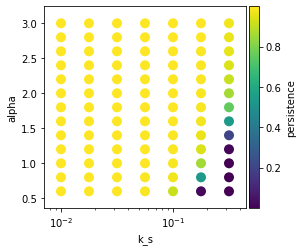

In [158]:
df = metrics.loc[(metrics["lambda"] == metrics["lambda"].min()) & (metrics.delta == 0), :]
plt = hv.Points(
    data=df,
    kdims=["k_s", "alpha"],
    vdims=["persistence"]
).opts(
    logx=True,
    color="persistence",
    cmap="viridis",
    colorbar=True,
    s=100,
)

plt

:Points   [k_s,alpha]   (persistence)
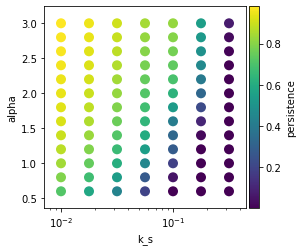

In [159]:
df = metrics.loc[(metrics["lambda"] == metrics["lambda"].min()) & (metrics.delta == delta_space[-1]), :]
plt = hv.Points(
    data=df,
    kdims=["k_s", "alpha"],
    vdims=["persistence"]
).opts(
    logx=True,
    color="persistence",
    cmap="viridis",
    colorbar=True,
    s=100,
)

plt

In [200]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[0]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
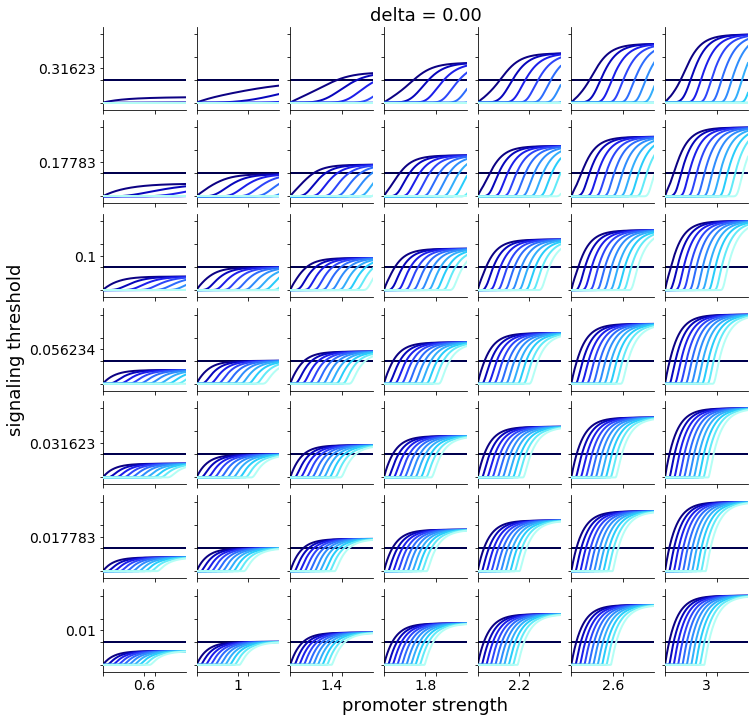

In [201]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

In [198]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[1]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
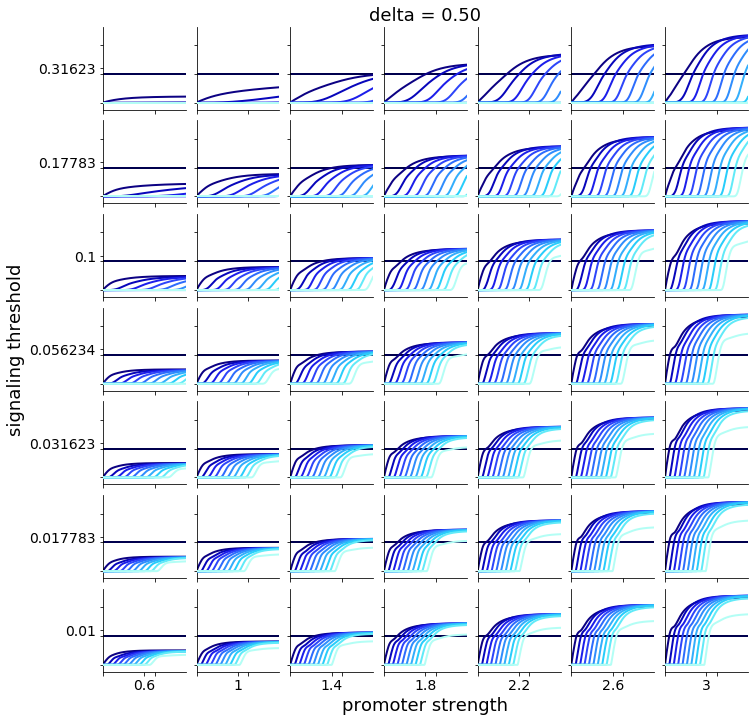

In [199]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

In [188]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[2]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
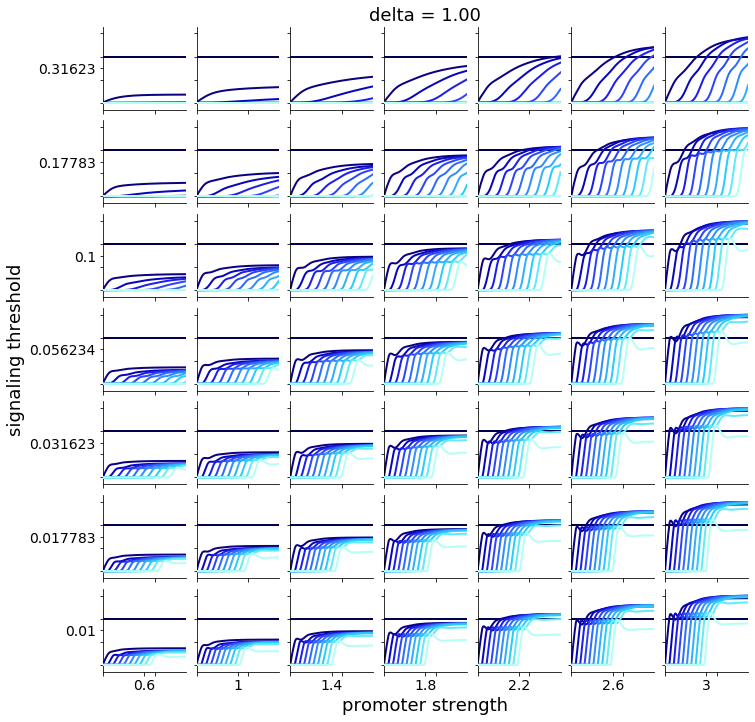

In [189]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

In [190]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[3]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
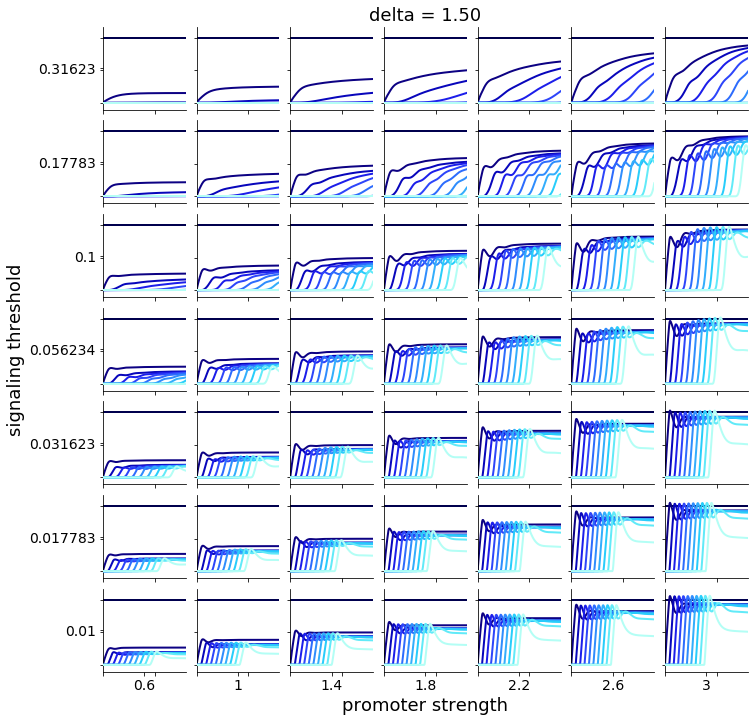

In [191]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

In [192]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[4]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
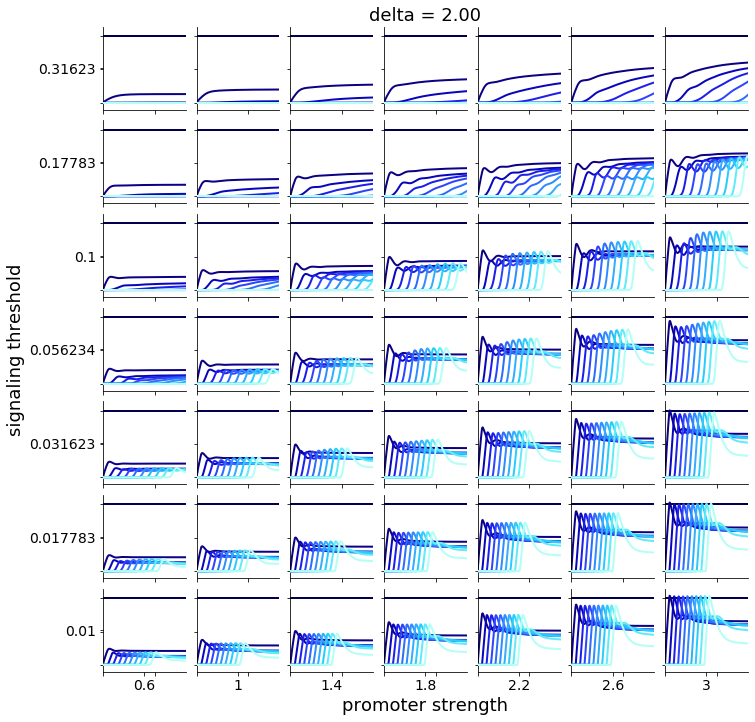

In [193]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

In [194]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[5]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
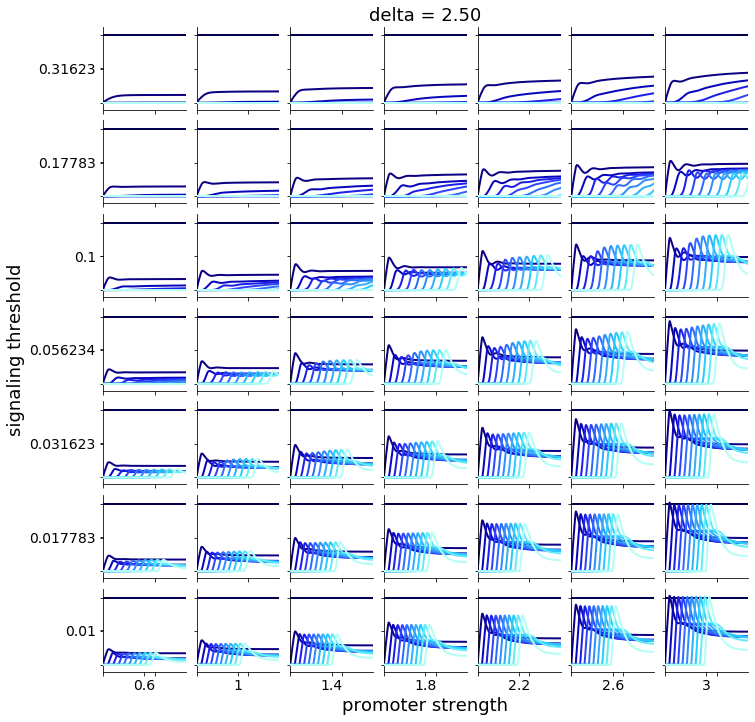

In [195]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

In [196]:
cycle = sample_cycle(cc.kbc, 11)
dlt = delta_space[6]

def plot_axis_curve(alpha, k_s):
    # Re-pack params
    data = full_data.loc[
        (full_data["alpha"] == alpha)
        & (full_data["k_s"] == k_s)
        & (full_data["delta"] == dlt)
        & (full_data["lambda"] == lambda_space[0]),
        :,
    ]

    # Make plot
    plt = (
        hv.Curve(data=data, kdims=["time"], vdims=["expression", "X_coord"],)
        .groupby("X_coord",)
        .opts(show_legend=False,)
        .overlay()
        .options({"Curve": dict(color=cycle)})
    )

    return plt


curve_dict_2D = {
    (alf, kay): plot_axis_curve(alf, kay) for alf in alpha_space[::2] for kay in k_s_space
}

:GridSpace   [promoter strength,signaling threshold]
   :NdOverlay   [X_coord]
      :Curve   [time]   (expression,X_coord)
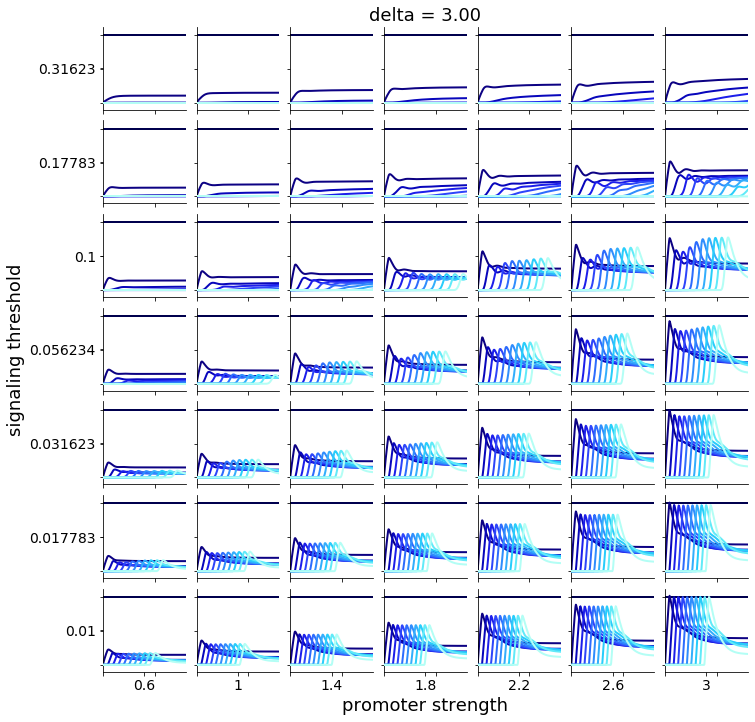

In [197]:
gridspace = hv.GridSpace(curve_dict_2D, kdims=["promoter strength", "signaling threshold"]).opts(
    fig_inches=8, fontsize=dict(labels=18, ticks=14, title=18), title=f"delta = {dlt:.2f}"
)
hv.output(gridspace)

<hr>

Below I'm going to pick parameter sets and make videos from them

In [209]:
%run lattice_oop.py

In [210]:
def ddeint_2D(
    dde_rhs,
    E0,
    t_out,
    delays,
    I_t,
    lattice,
    dde_args=(),
    n_time_points_per_step=20,
    progress_bar=False,
):
    """Solve a delay differential equation on a growing lattice of cells."""
    
    assert all([delay > 0 for delay in delays]), "Non-positive delays are not permitted."

    t0 = t_out[0]
    t_last = t_out[-1]

    # Extract shortest and longest non-zero delay parameters
    min_tau = min(delays)

    # Get graph transition matrix 
    A = lattice.transition_mtx()
    
    # Make a shorthand for RHS function
    def rhs(E, t, E_past):
        return dde_rhs(
            E,
            t,
            E_past,
            I_t=I_t,
            A=A,
            delays=delays,
            params=dde_args,
        )

    # Define a piecewise function to fetch past values of E
    time_bins = [t0]
    E_past_funcs = [lambda t, *args: E0(t, I_t=I_t, n_cells=lattice.n_cells())]

    def E_past(t):
        """Define past expression as a piecewise function."""
        bin_idx = next((i for i, t_bin in enumerate(time_bins) if t < t_bin))
        return E_past_funcs[bin_idx](t)

    # Initialize expression.
    E = E0(t0, I_t=I_t, n_cells=lattice.n_cells())

    t_dense = []
    E_dense = []
    
    # Integrate in steps of size min_tau. Stops before the last step.
    t_step = np.linspace(t0, t0 + min_tau, n_time_points_per_step + 1)
    n_steps = ceil((t_out[-1] - t0) / min_tau)
    
    iterator = range(n_steps)
    if progress_bar:
        iterator = tqdm.tqdm(iterator)
        
    for j in iterator:

        # Start the next step
        E_step = [E]

        # Perform integration
        for i, t in enumerate(t_step[:-1]):
            dE_dt = rhs(E, t, E_past)
            dt = t_step[i + 1] - t
            E = np.maximum(E + dE_dt * dt, 0)
            E_step.append(E)
        
        t_dense = t_dense + list(t_step[:-1])
        E_dense = E_dense + E_step[:-1]
        
        # Make B-spline
        E_step = np.array(E_step)
        tck = [
            [snt.splrep(t_step, E_step[:, cell, i]) for i in range(E.shape[1])]
            for cell in range(lattice.n_cells())
        ]

        # Append spline interpolation to piecewise function
        time_bins.append(t_step[-1])
        interp = lambda t, k=j + 1: np.array(
            [
                [np.maximum(snt.splev(t, tck[cell][i]), 0) for i in range(E.shape[1])]
                for cell in range(lattice.n_cells())
            ]
        )
        E_past_funcs.append(interp)

        # Get time-points for next step
        t_step += min_tau
        
        # Make the last step end at t_last
        if t_step[-1] > t_last:
            t_step = np.concatenate((t_step[t_step < t_last], (t_last,),))

    # Add data for last time-point
    t_dense = t_dense + [t_last]
    E_dense = E_dense + [E]

    # Interpolate solution for returning
    t_dense = np.array(t_dense)
    E_dense = np.array(E_dense)
    
    E_return = np.empty((len(t_out), *E.shape))
    for cell in range(E.shape[0]):
        for i in range(E.shape[1]):
            tck = snt.splrep(t_dense, E_dense[:, cell, i])
            E_return[:, cell, i] = np.maximum(snt.splev(t_out, tck), 0)

    return E_return

In [211]:
def rhs_tc_delay_cis_leak_2D(E, t, E_past, I_t, A, delays, params):

    tau = delays[0]
    alpha, k_s, p_s, delta, lambda_ = params

    # Get the signal input E_bar to each cell after a delay tau
    E_tau = E_past(t - tau)
    E_bar = np.dot(A, E_tau)

    # Evaluate Hill term
    f = E_bar ** p_s / (k_s ** p_s + (delta * E_tau) ** p_s + E_bar ** p_s)

    # Calculate change in expression
    dE_dt = lambda_ + alpha * f - E
    dE_dt[0, :] = I_t(t) - E[0, :]

    return dE_dt

In [212]:
def E0(t, I_t, n_cells): 
    E = np.zeros((n_cells, 1), dtype=float)
    E[0, :] = I_t(t)
    return E

In [213]:
def I_t(t): return 1

Interesting parameter sets for videos 

|#  |alpha|k_s|p_s|delta|lambda|tau|
|---|---|---|---|---|---|---|
|  | 1|0.056234|2|0|1.00E-06|0.4|

|#  |alpha|k_s|p_s|delta|lambda|tau|
|---|---|---|---|---|---|---|
|  | 1.8|0.056234|2|1|1.00E-06|0.4|
|  | 0.6|0.17783|2|1|1.00E-06|0.4|

|#  |alpha|k_s|p_s|delta|lambda|tau|
|---|---|---|---|---|---|---|
|  | 2.2|0.1|2|2|1.00E-06|0.4|
|  | 2.2|0.17783|2|2|1.00E-06|0.4|
| 2.2|0.31623|2|2|1.00E-06|0.4|
  
|#  |alpha|k_s|p_s|delta|lambda|tau|
|---|---|---|---|---|---|---|
|  | 3|0.1|2|3|1.00E-06|0.4|
|  | 3|0.17783|2|3|1.00E-06|0.4|
|  | 3|0.31623|2|3|1.00E-06|0.4|

|#  |alpha|k_s|p_s|delta|lambda|tau|
|---|---|---|---|---|---|---|
|  | 3|0.031623|2|3|1.00E-06|0.4|
|  | 1|0.17783|2|2|1.00E-06|0.4|

|#  |alpha|k_s|p_s|delta|lambda|tau|
|---|---|---|---|---|---|---|
|  | 2.2|0.031623|2|0|1.00E-06|0.4|
|  | 2.2|0.031623|2|1|1.00E-06|0.4|
|  | 2.2|0.031623|2|1.5|1.00E-06|0.4|
|  | 2.2|0.031623|2|2|1.00E-06|0.4|
|  | 2.2|0.031623|2|2.5|1.00E-06|0.4|
|  | 2.2|0.031623|2|3|1.00E-06|0.4|

In [217]:
# DE parameters
param_space = np.array([
    # alpha           k_s  p_s    delta   lambda
    (     1, k_s_space[3],   2,       0,    1e-6), # regular propagation
    (   1.8, k_s_space[3],   2,       1,    1e-6), # initial activation, drop for cis-inhib, sustained activation
    (   0.6, k_s_space[5],   2,       1,    1e-6), # no propagation
    (   2.2, k_s_space[4],   2,       2,    1e-6), # propagation
    (   2.2, k_s_space[5],   2,       2,    1e-6), # weird behavior - the pulses decay, but the lattice sort of activates
    (   2.2, k_s_space[6],   2,       2,    1e-6), # no or very slow propagation
    (     3, k_s_space[4],   2,       3,    1e-6), # propagation
    (     3, k_s_space[5],   2,       3,    1e-6), # weird behavior - the pulses decay, but the lattice sort of activates
    (     3, k_s_space[6],   2,       3,    1e-6), # no or very slow propagation
    (     3, k_s_space[2],   2,       3,    1e-6), # transient activation?
    (     1, k_s_space[5],   2,       2,    1e-6), # attenuation
    (   2.2, k_s_space[2],   2,       0,    1e-6), # no feedback
    (   2.2, k_s_space[2],   2,       1,    1e-6), # weak feedback - still sustained activation
    (   2.2, k_s_space[2],   2,     1.5,    1e-6), # weak feedback - enough to reduce steady-state to spike levels
    (   2.2, k_s_space[2],   2,       2,    1e-6), # high-med SS
    (   2.2, k_s_space[2],   2,     2.5,    1e-6), # low-med SS
    (   2.2, k_s_space[2],   2,       3,    1e-6), # low SS
])

# Delay parameters
tau = 0.4
delays = (tau,)

In [218]:
# Make lattice
lax2d = Regular2DLattice(R = 10)
n_cells = lax2d.n_cells()
axis_cells = ((lax2d.X[:, 1] == 0) & (lax2d.X[:, 0] >= 0)).nonzero()[0]
n_axis_cells = axis_cells.size
cells = np.array(lax2d.uIDs(), dtype='<U3')

# Simulation time
t_results = np.linspace(0, 8, 201)

In [225]:
import tqdm

df_list = []
vid_list = []

iterator = param_space
iterator = tqdm.tqdm(iterator)
for params in iterator:

    # Run simulation
    results = ddeint_2D(
        dde_rhs=rhs_tc_delay_cis_leak_2D,
        E0=E0,
        t_out=t_results,
        delays=delays,
        I_t=I_t,
        lattice=lax2d,
        dde_args=params,
        n_time_points_per_step=100,
        progress_bar=False,
    )

    axis_results = results[:, axis_cells, :]

    param_names = ["alpha", "k_s", "p_s", "delta", "lambda"]
    delay_names = ["tau"]
    species_names = ["expression"]

    lax_data = {
        "cell": np.array(
            [
                "cell_" + cell
                for cell in np.tile(cells, t_results.size)
            ]
        ),
        "X_coord": np.tile(lax2d.X[:, 0], t_results.size),
        "Y_coord": np.tile(lax2d.X[:, 1], t_results.size),
        "step": np.repeat(np.arange(t_results.size), n_cells),
        "time": np.repeat(t_results, n_cells),
    }

    expr = results.reshape(-1, results.shape[-1])

    param_data = lax_data.copy()
    param_data.update({sp: ex for sp, ex in zip(species_names, expr.T)})

    for p, v in zip(param_names, params):
        param_data[p] = v

    for d, v in zip(delay_names, delays):
        param_data[d] = v

    df = pd.DataFrame(param_data)
    df_list.append(df)

    vid = Regular2DLattice_vid_mp4(
        df=df,
        R=lax2d.R,
        dt = t_results[1] - t_results[0],
        val="expression",
        colors=cc.palette.kgy,
    #     levels=None,
    #     points_opts=None,
    #     title=None,
    #     title_format=None,
        fps=10,
    )
    vid_list.append(vid)

100%|██████████| 17/17 [06:32<00:00, 23.10s/it]


In [226]:
import os
import tqdm

directory = os.path.join(str(date.today()) + "_2D_delay_sims", "sender_zs_cis_delay_leak")

if not os.path.exists(directory):
    os.makedirs(directory)

iterator = zip(param_space, vid_list)
iterator = tqdm.tqdm(iterator)

for vid_params, vid_hmap in iterator:
    fname = "_".join((
        "alpha{0:.1f}",
        "k_s{1:.1e}",
        "p_s{2:.1f}",
        "delta{3:.1f}",
        "lambda{4:.1e}",
        "tau{5:.1f}"
    )).format(*vid_params, *delays)
    
    to_path = os.path.join(directory, fname + ".mp4")
    hv.save(vid_hmap, to_path, fps=20)

17it [27:54, 98.48s/it]
